In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from preprocesamiento import obtenerDFTraining
from preprocesamiento import feature_engineering
from preprocesamiento import preprocesar_data_frame

RANDOM_STATE = 19 * 103785

In [3]:
df = obtenerDFTraining()
feature_engineering(df)
(X, Y) = preprocesar_data_frame(df)

El numero minimo de componentes para explicar el 99% de la varianza es: 18


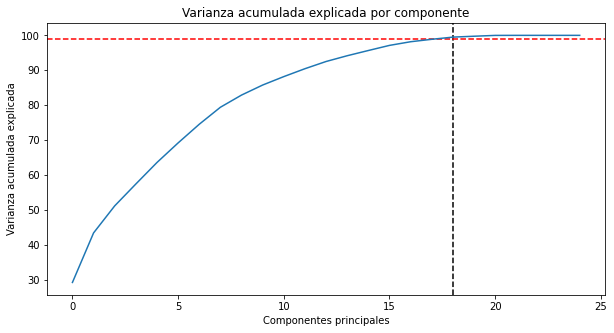

In [4]:
X = pd.get_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo',
                                      'estado_marital','genero',"anios_estudiados"]])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=RANDOM_STATE)

pca = PCA()
pca.fit(x_train)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 99% of the variance?
k = np.argmax(var_cumu > 99)
print(
    "El numero minimo de componentes para explicar el 99% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
ax = plt.plot(var_cumu)